# Project 3: Poisonous mushrooms

In this project, you'll investigate properties of mushrooms. This classic dataset contains over 8000 observations, where each mushroom is described by a variety of features like color, odor, etc., and the target variable is an indicator for whether the mushroom is poisonous. Since all the observations are categorical, I've binarized the feature space. Look at the feature_names below to see all 126 binary names.

You'll start by running PCA to reduce the dimensionality from 126 down to 2 so that you can easily visualize the data. In general, PCA is very useful for visualization (though sklearn.manifold.tsne is known to produce better visualizations). Recall that PCA is a linear transformation. The 1st projected dimension is the linear combination of all 126 original features that captures as much of the variance in the data as possible. The 2nd projected dimension is the linear combination of all 126 original features that captures as much of the remaining variance as possible. The idea of dense low dimensional representations is crucial to machine learning!

Once you've projected the data to 2 dimensions, you'll experiment with clustering using KMeans and density estimation with Gaussian Mixture Models. Finally, you'll train a classifier by fitting a GMM for the positive class and a GMM for the negative class, and perform inference by comparing the probabilities output by each model.

As always, you're welcome to work on the project in groups and discuss ideas on the course wall, but please prepare your own write-up and write your own code.

In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.mixture import GMM
from matplotlib.colors import LogNorm

Load feature names.

In [2]:
feature_names = []
with open('../Data/mushroom.map') as fmap:
    for line in fmap:
        [index, name, junk] = line.split()
        feature_names.append(name)

print 'Loaded feature names:', len(feature_names)

Loaded feature names: 126


Load data. The data is sparse in the input file, but there aren't too many features, so we'll use a dense representation, which is supported by all sklearn objects.

In [3]:
X, Y = [], []

with open('../Data/mushroom.data') as fdata:
    for line in fdata:
        items = line.split()
        Y.append(int(items.pop(0)))
        x = np.zeros(len(feature_names))
        for item in items:
            feature = int(item.split(':')[0])
            x[feature] = 1
        X.append(x)

# Convert these lists to numpy arrays.
X = np.array(X)
Y = np.array(Y)

# Split into train and test data.
train_data, train_labels = X[:7000], Y[:7000]
test_data, test_labels = X[7000:], Y[7000:]

# Check that the shapes look right.
print train_data.shape, test_data.shape
print train_labels.shape

(7000L, 126L) (1124L, 126L)
(7000L,)


(1) Run Principal Components Analysis on the data. Show what fraction of the total variance in the training data is explained by the first k principal components, for k in [1, 50].

In [4]:
def P1():
### STUDENT START ###
    k = range(1,52)

    variance_list = []
    #run PCA for every parameter k
    for i in range(1,len(k)):
        #plt.cla()
        pca = PCA(n_components=k[i])
        pca.fit(train_data)
        X = pca.transform(train_data)
        #pca.fit_transform(test_data)

        #Results
        variance_temp = pca.explained_variance_ratio_
        print "Total Cummulative Variance: " + str(round(np.sum(variance_temp),3)) + " Component Count :" + str(i) + " Last Component Varianace: " + str(round(variance_temp[i-1],3))

### STUDENT END ###

P1()

Total Cummulative Variance: 0.297 Component Count :1 Last Component Varianace: 0.164
Total Cummulative Variance: 0.399 Component Count :2 Last Component Varianace: 0.133
Total Cummulative Variance: 0.47 Component Count :3 Last Component Varianace: 0.102
Total Cummulative Variance: 0.508 Component Count :4 Last Component Varianace: 0.071
Total Cummulative Variance: 0.545 Component Count :5 Last Component Varianace: 0.039
Total Cummulative Variance: 0.576 Component Count :6 Last Component Varianace: 0.037
Total Cummulative Variance: 0.604 Component Count :7 Last Component Varianace: 0.031
Total Cummulative Variance: 0.63 Component Count :8 Last Component Varianace: 0.027
Total Cummulative Variance: 0.652 Component Count :9 Last Component Varianace: 0.026
Total Cummulative Variance: 0.673 Component Count :10 Last Component Varianace: 0.022
Total Cummulative Variance: 0.691 Component Count :11 Last Component Varianace: 0.02
Total Cummulative Variance: 0.709 Component Count :12 Last Compone

(2) PCA can be very useful for visualizing data. Project the training data down to 2 dimensions and plot it. Show the positive (poisonous) cases in blue and the negative (non-poisonous) in red. Here's a reference for plotting: http://matplotlib.org/users/pyplot_tutorial.html

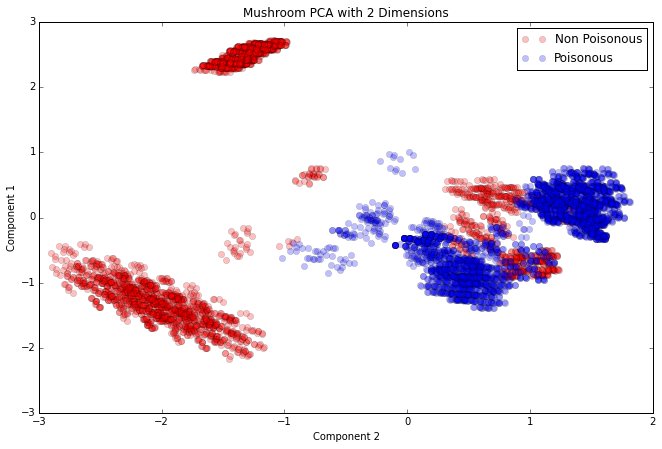

In [5]:
def P2():
### STUDENT START ###
    pca = PCA(n_components=2)
    pca.fit(train_data)
    X = pca.transform(train_data)
    
    #add on the training labels
    train_long = np.reshape(train_labels,(1,7000)) #must format as (1L, 7000) not (7000L,)
    df_graph = np.concatenate((train_long.T, X), axis = 1) #the T is critical to the code working, axis = 1 means add the columns
    
    #visually show the data after its been reduced to 2 dimensions
    plt.figure(figsize=(11, 7))
    plt.plot(df_graph[df_graph[:,0]!=0,1], df_graph[df_graph[:,0]!=0,2], "ro", label = "Non Poisonous", alpha =0.25) #must plot series separately, first subset to just not posionous, then grab (x,y) with x[:,0]and [:,1]
    plt.plot(df_graph[df_graph[:,0]!=1,1], df_graph[df_graph[:,0]!=1,2], "bo", label = "Poisonous", alpha =0.25) #same thing for poisonous shrooms
    plt.title('Mushroom PCA with 2 Dimensions')  
    plt.ylabel('Component 1') 
    plt.xlabel('Component 2') 
    plt.legend(loc='upper right')
### STUDENT END ###

P2()

(3) Run KMeans with [1,16] clusters over the 2d projected data. Mark each centroid cluster and plot a circle that goes through the most distant point assigned to each cluster.

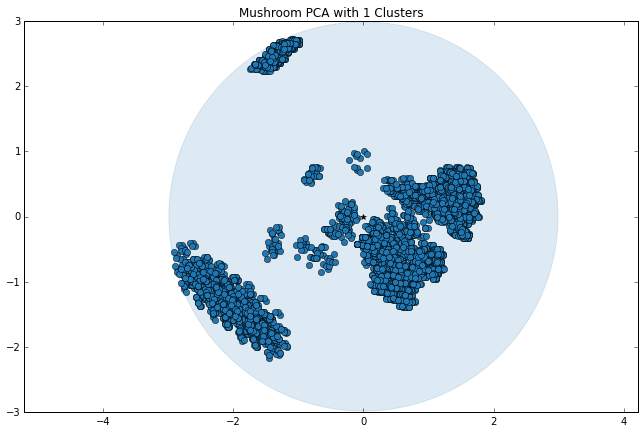

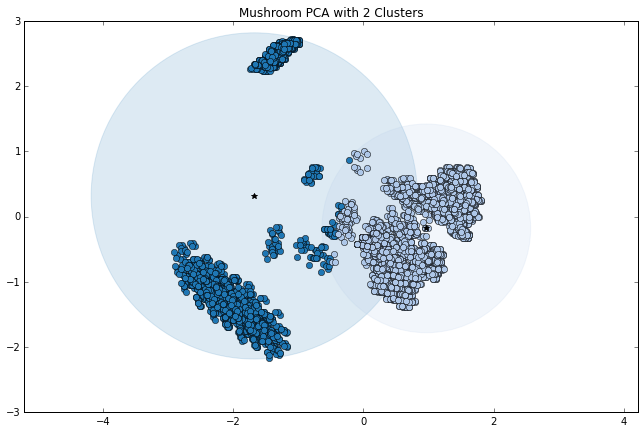

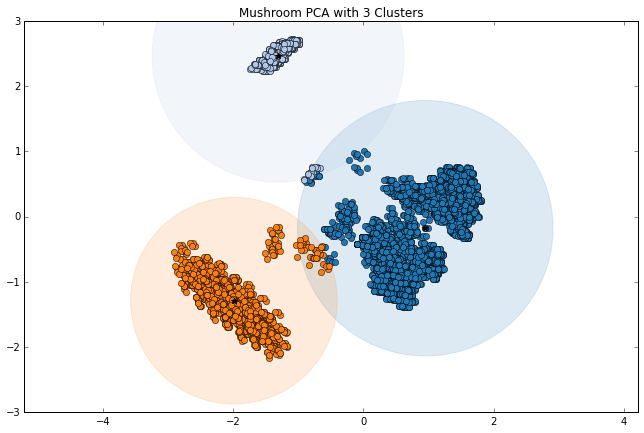

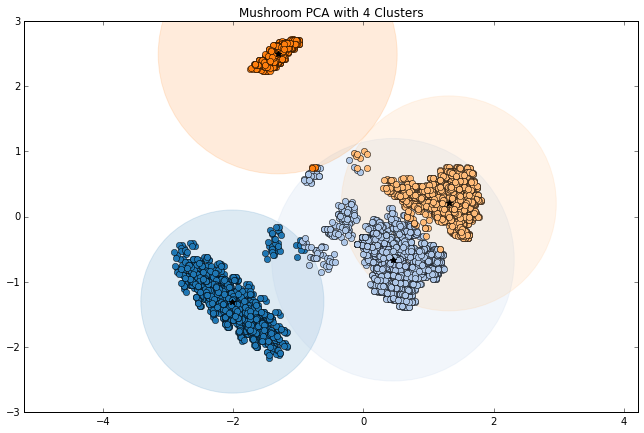

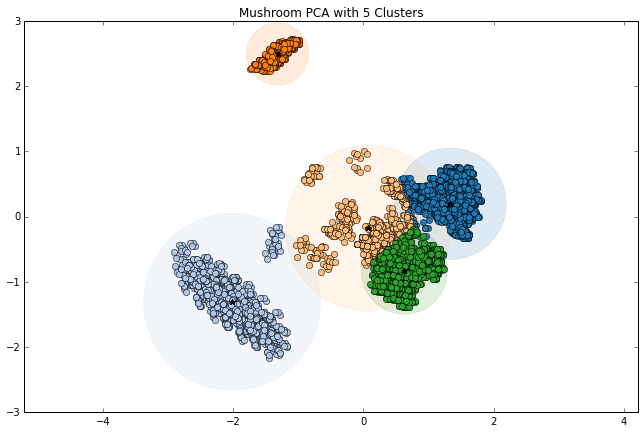

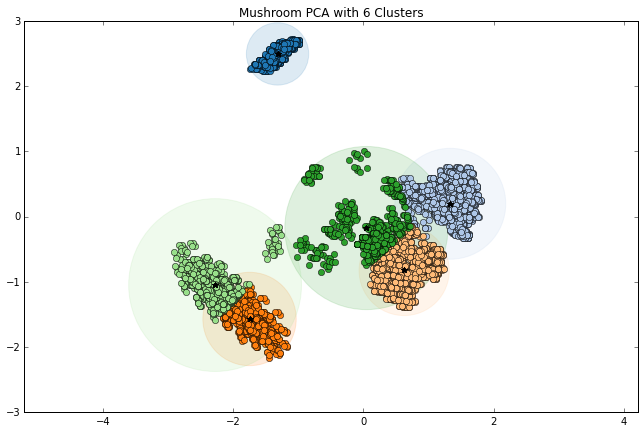

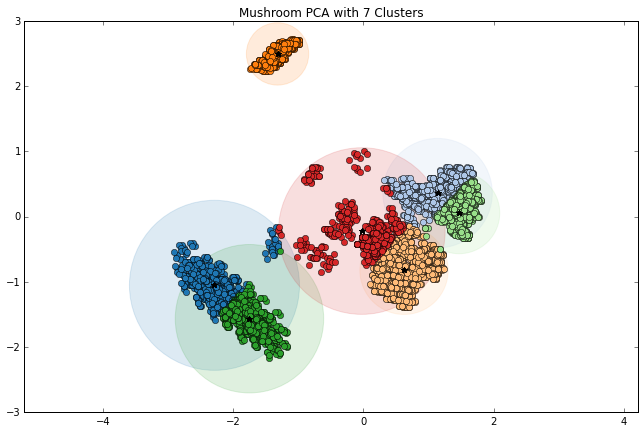

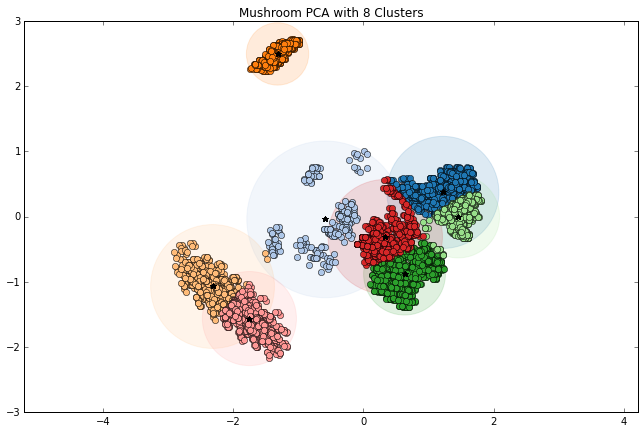

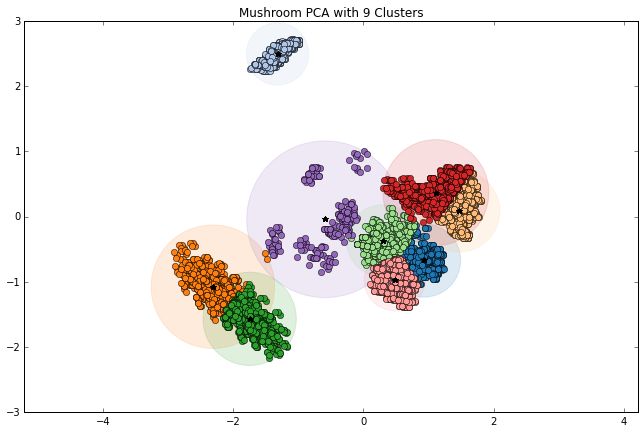

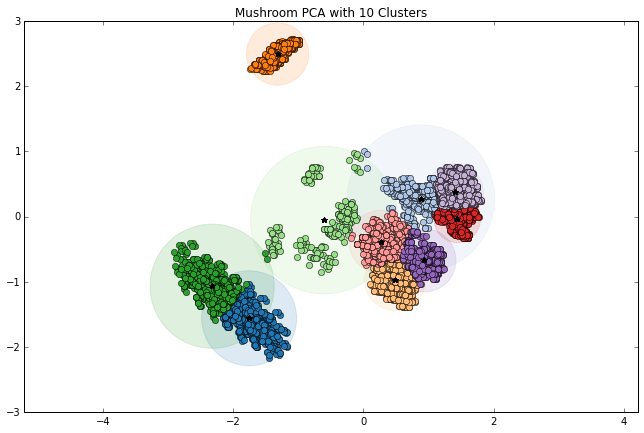

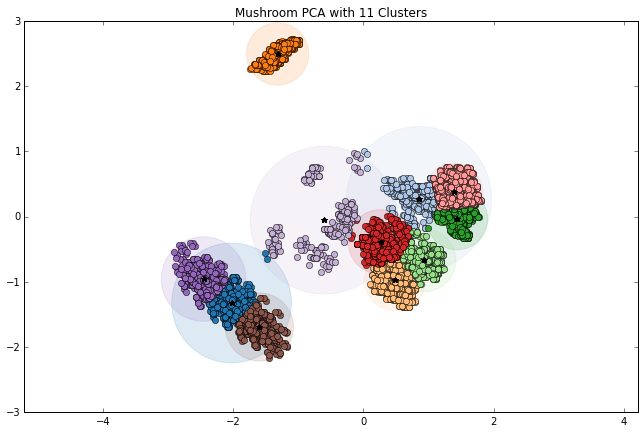

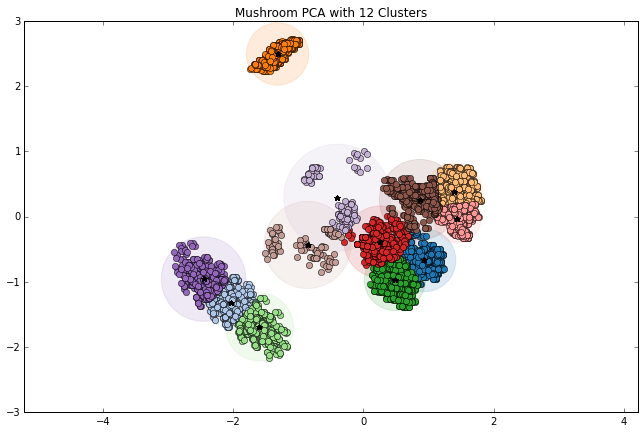

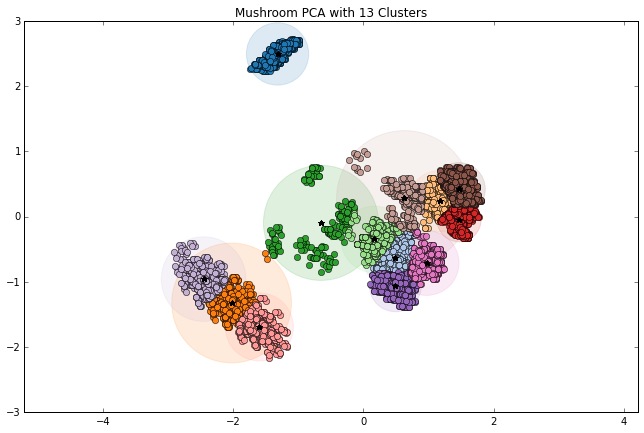

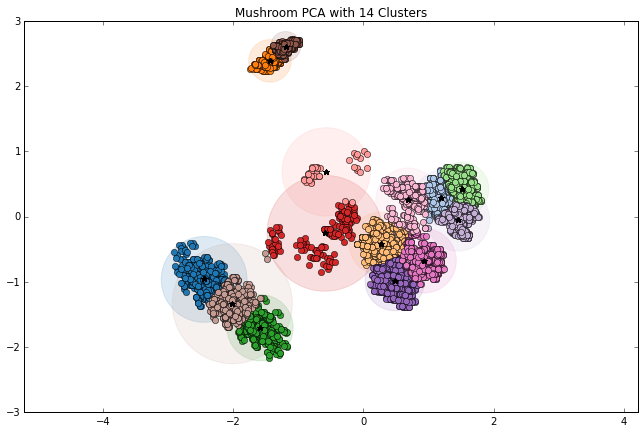

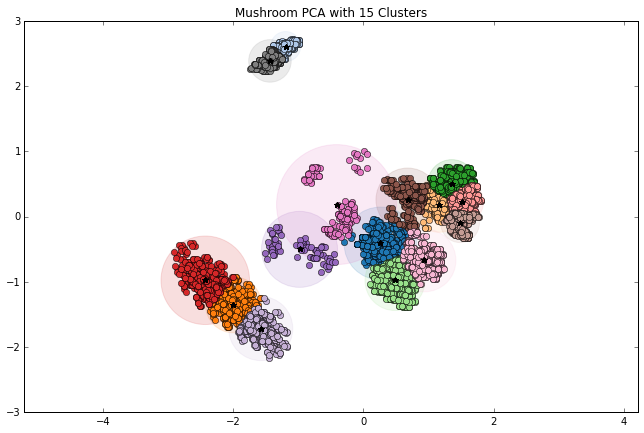

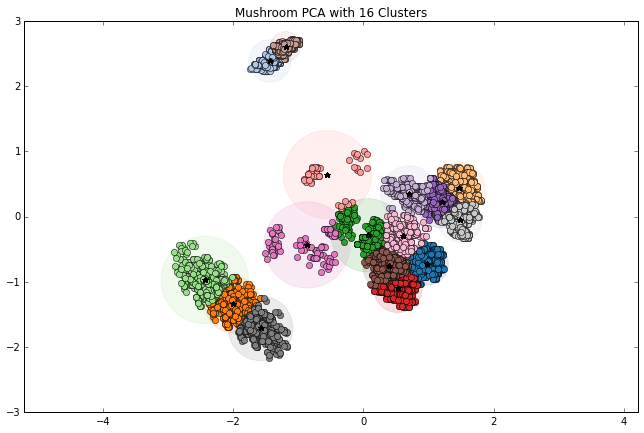

In [6]:
k_values = range(1,17)
### STUDENT START ###
pca = PCA(n_components=2)
pca.fit(train_data)
train_2d_data = pca.transform(train_data)

color_lst2 = ["#1f77b4","#aec7e8", "#ff7f0e","#ffbb78",
              "#2ca02c","#98df8a","#d62728","#ff9896",
              "#9467bd","#c5b0d5","#8c564b","#c49c94",
              "#e377c2","#f7b6d2","#7f7f7f","#c7c7c7",
              "#bcbd22","#dbdb8d","#17becf","#9edae5"]
#color_lst = ["#393b79","#6b6ecf","#637939","#b5cf6b","#cedb9c","#8c6d31","#bd9e39","#e7ba52","#e7cb94","#843c39","#ad494a","#d6616b","#e7969c","#7b4173","#a55194","#ce6dbd", "#de9ed6"]
#fig, axes = plt.subplots(4,4,figsize=(16,16))
#for n in range (1,5):
#    for m in range(0,len(matrix_type_list)):
#run kmeans; try out some different k here
for k in (k_values):
    #builds model
    model = KMeans(n_clusters=k, precompute_distances = True)
    model.fit(train_2d_data, train_labels)

    #find the centers
    cluster_centers = (model.cluster_centers_)

    #make a df with the cluster labels    
    train_long_labels = np.reshape(model.labels_,(1,7000)) #must format as (1L, 7000) not (7000L,)
    df_graph = np.concatenate((train_long_labels.T, train_2d_data), axis = 1) #the T is critical to the code working, axis = 1 means add the columns
    
    #kmeans has built in mechanism to calculate the distance of the points to each centroid
    distances = model.transform(train_2d_data)
    df_graph = np.hstack((df_graph, distances))
    
    #visually show the data after its been reduced to 2 dimensions
    plt.figure(figsize=(11, 7))
    #fig, axes = plt.subplots(1,3,figsize=(10,10))
    #plot all datapoints
    for j in range(0,k+1):
        plt.plot(df_graph[df_graph[:,0]==j,1], df_graph[df_graph[:,0]==j,2],marker='o',linestyle='', color = color_lst2[j]) #must plot series separately, first subset to just not posionous, then grab (x,y) with x[:,0]and [:,1]
        #plot centers
    #add cluster centers to plot
    for f in range(0,k):
        plt.plot(np.asarray(cluster_centers)[:,0],np.asarray(cluster_centers)[:,1],marker='*',linestyle='',color='black')
        #reduce df_graph to just the datapoints in the cluster
        necessary_evil = df_graph[df_graph[:,0]==f]
        #find the max dist (radius) for each cluster
        circle = plt.Circle((np.asarray(cluster_centers)[f,0],np.asarray(cluster_centers)[f,1]),color = color_lst2[f], radius = np.max(necessary_evil[:,f+3]), alpha =0.15) #np.max(df_graph[df_graph[:,0]==f,f+3])
        plt.axes().set_aspect('equal', 'datalim')#makes actual circles not ovals
        #plt.axis(xmin =-3, xmax=3, ymin=-3, ymax=3) #not sure this is still effective (???)
        plt.gca().add_artist(circle) #circles are weird and need a second plot
    plt.title('Mushroom PCA with '+ str(f+1) + ' Clusters')  


### STUDENT END ###


(4) Fit a Gaussian Mixture Model for the positive examples in your 2d projected data. Plot the estimated density contours as shown here: http://scikit-learn.org/stable/auto_examples/mixture/plot_gmm_pdf.html#example-mixture-plot-gmm-pdf-py. Vary the number of mixture components from 1-4 and the covariance matrix type ('spherical', 'diag', 'tied', 'full').

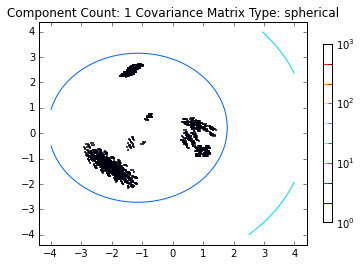

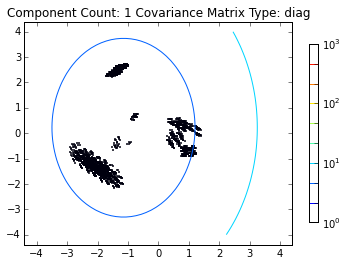

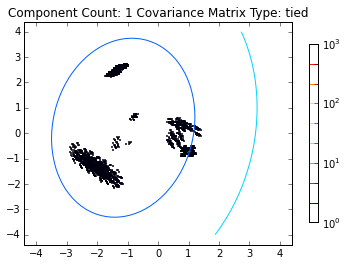

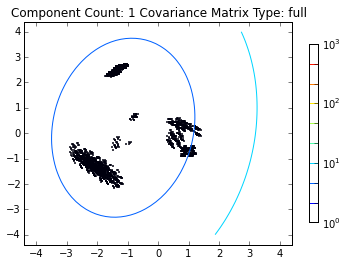

C:\Users\N0209810\.conda\envs\my_root\lib\site-packages\matplotlib\contour.py:1516: UserWarning: Log scale: values of z <= 0 have been masked
  warnings.warn('Log scale: values of z <= 0 have been masked')


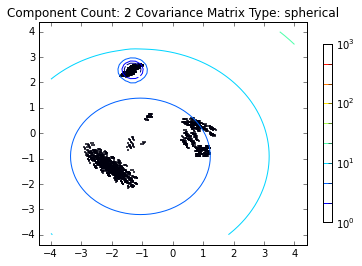

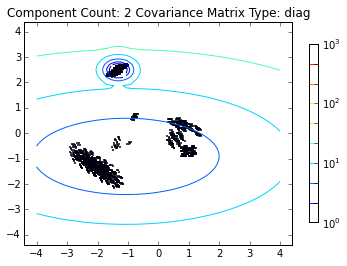

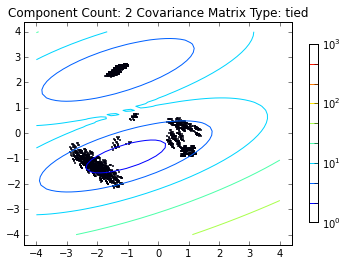

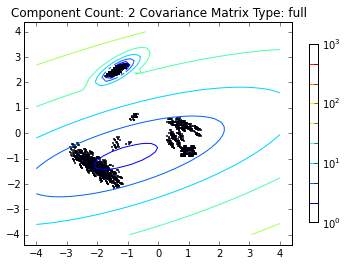

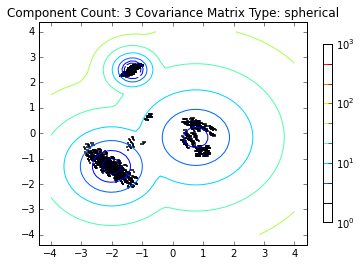

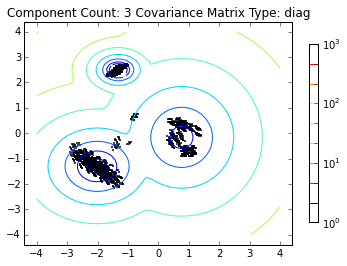

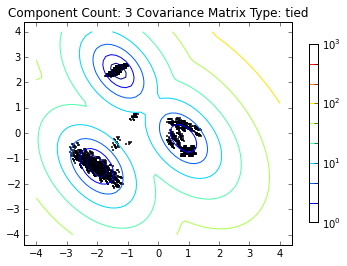

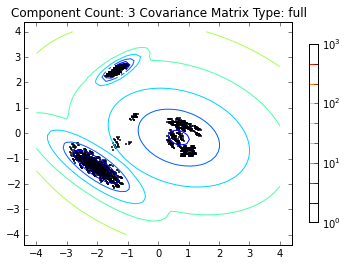

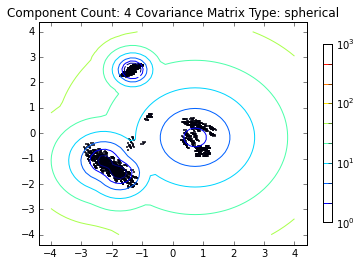

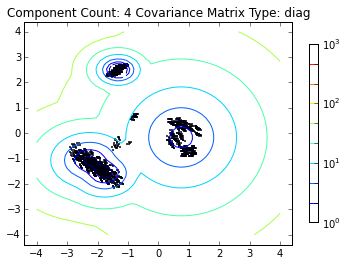

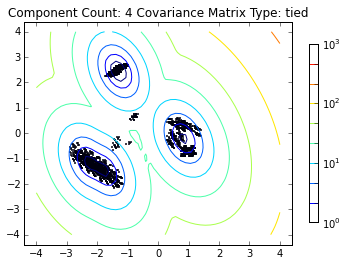

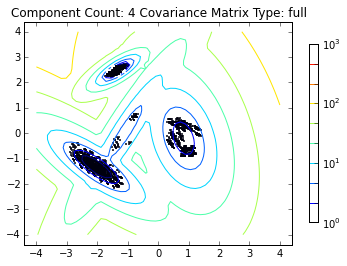

In [7]:
#def P4():
### STUDENT START ###
matrix_type_list = ['spherical', 'diag', 'tied', 'full']

for n in range (1,5):
    for m in range(0,len(matrix_type_list)):
        #data from previus problem (2 components); filtered to positive cases
        train_2d_data_gmm = train_2d_data[train_labels ==1]
        #print train_2d_data_gmm.shape
        # fit a Gaussian Mixture Model with two components
        clf = GMM(n_components=n, covariance_type=matrix_type_list[m])
        model_gaussian = clf.fit(train_2d_data_gmm)

        # display predicted scores by the model as a contour plot
        x = np.linspace(-4., 4)
        y = np.linspace(-4., 4)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -clf.score_samples(XX)[0]
        #fit to 50L X 50L
        Z = Z.reshape(X.shape)
        #Make plots
        CS = plt.contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                         levels=np.logspace(0, 3, 10))
        CB = plt.colorbar(CS, shrink=0.8, extend='both')
        plt.scatter(train_2d_data_gmm[:, 0], train_2d_data_gmm[:, 1], .8)
        #graph parameters
        title = "Component Count: " + str(n) + " Covariance Matrix Type: " + str(matrix_type_list[m])
        plt.title(title)
        plt.axis('tight')
        plt.show()

### STUDENT END ###

#P4()

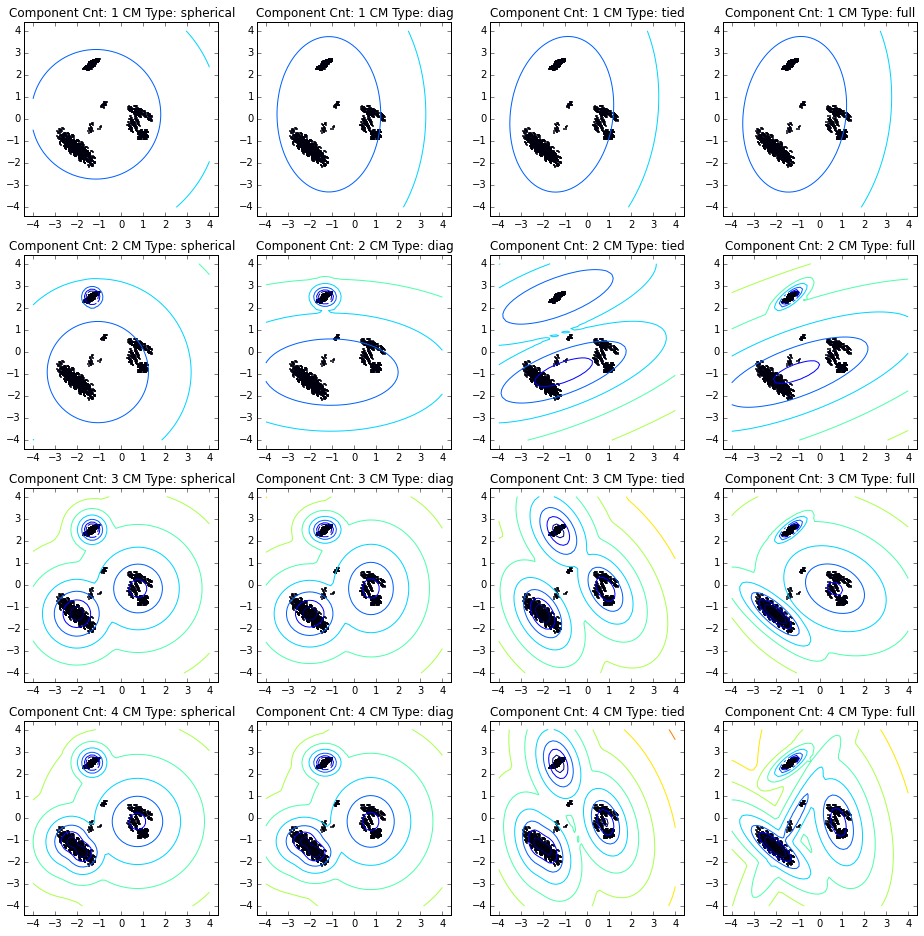

In [8]:
#def P4():
### STUDENT START ###
matrix_type_list = ['spherical', 'diag', 'tied', 'full']

fig, axes = plt.subplots(4,4,figsize=(16,16))
for n in range (1,5):
    for m in range(0,len(matrix_type_list)):
        #data from previus problem (2 components); filtered to positive cases
        train_2d_data_gmm = train_2d_data[train_labels ==1]
        #print train_2d_data_gmm.shape
        # fit a Gaussian Mixture Model with two components
        clf = GMM(n_components=n, covariance_type=matrix_type_list[m])
        model_gaussian = clf.fit(train_2d_data_gmm)

        # display predicted scores by the model as a contour plot
        x = np.linspace(-4., 4)
        y = np.linspace(-4., 4)
        X, Y = np.meshgrid(x, y)
        XX = np.array([X.ravel(), Y.ravel()]).T
        Z = -clf.score_samples(XX)[0]
        #fit to 50L X 50L
        Z = Z.reshape(X.shape)
        #Make plots
        CS = axes[n-1,m].contour(X, Y, Z, norm=LogNorm(vmin=1.0, vmax=1000.0),
                         levels=np.logspace(0, 3, 10))
        #axes[n-1,m].plt.colorbar(CS, shrink=0.8, extend='both')
        axes[n-1,m].scatter(train_2d_data_gmm[:, 0], train_2d_data_gmm[:, 1], .8)
        #graph parameters
        title = "Component Cnt: " + str(n) + " CM Type: " + str(matrix_type_list[m])
        axes[n-1,m].set_title(title)
        #axes[n-1,m].axis('tight')
        #axes[n-1,m].show()

### STUDENT END ###

#P4()

(5) Fit two 4-component full covariance GMMs, one for the positive examples and one for the negative examples in your 2d projected data. Predict the test examples by choosing the label for which the model gives a larger probability (use GMM.score). What is the accuracy?

In [9]:
def P5():
    ### STUDENT START ###

    #fit test data to 2D
    pca = PCA(n_components=2)
    pca.fit(train_data)
    test_2d_data = pca.transform(test_data)

    #Positive examples
    #################################################################
    #data from previus problem (2 components); filtered to positive cases
    train_2d_data_pos = train_2d_data[train_labels ==1]

    # fit a Gaussian Mixture Model with two components
    clf_pos = GMM(n_components=4, covariance_type="full")
    model_gaussian_pos = clf_pos.fit(train_2d_data_pos)#.predict(test_2d_data)

    #determine the likelyhood of belonging to each class
    prob_pos =clf_pos.score(test_2d_data)

    #Negative examples
    #################################################################
    #data from previus problem (2 components); filtered to positive cases
    train_2d_data_neg = train_2d_data[train_labels ==0]

    # fit a Gaussian Mixture Model with two components
    clf_neg = GMM(n_components=4, covariance_type="full")
    model_gaussian_neg = clf_neg.fit(train_2d_data_neg)
    prob_neg =clf_neg.score(test_2d_data)

    #Merge Models
    ################################################################
    #Decide if its better suited as a positive or negative case
    predictions = np.where(prob_neg>prob_pos,0,1)
    #Accuracy Calc
    wrong_prediction = (predictions != test_labels)
    print "GMM "
    print 'Number of incorrect predictions:', np.sum(wrong_prediction)
    accuracy_rate = np.sum((predictions == test_labels))/float(len(test_labels))*100
    print 'Accuracy Rate ' +  "{0:.1f}%".format(accuracy_rate)

### STUDENT END ###

P5()

GMM 
Number of incorrect predictions: 55
Accuracy Rate 95.1%


(6) Ideally, we'd like a model that gives the best accuracy with the fewest parameters. Run a series of experiments to find the model that gives the best accuracy with no more than 50 parameters. For example, with 3 PCA components and 2-component diagonal covariance GMMs, you'd have:

( (3 mean vector + 3 covariance matrix) x 2 components ) x 2 classes = 24 parameters

You should vary the number of PCA components, the number of GMM components, and the covariance type.

In [55]:
def P6():
### STUDENT START ###

    #Parameters
    ######################################################################
    pca_dimensions = range(0,15)
    GMM_components = range(0,15)
    matrix_type_list = ['spherical', 'diag', 'tied', 'full']
    
    results = []
    #Math
    for p in range (1,len(pca_dimensions)):
        for b in range(1,len(GMM_components)):
            for c in range(0,len(matrix_type_list)):
                #calc the covariance matrix by shape
                if matrix_type_list[c] == 'spherical':
                    cm = GMM_components[b] + 1 #only measure is radius
                elif matrix_type_list[c] == 'diag':
                    cm = GMM_components[b] + pca_dimensions[p] #2 (height & width) for 2dim
                elif matrix_type_list[c]=='tied':
                    cm = GMM_components[b] + (GMM_components[b]* pca_dimensions[p]**2)/2 
                    #cm = GMM_components[b] + (pca_dimensions[p]**2-pca_dimensions[p])/2 
                    #cm = GMM_components[b] + (pca_dimensions[p] + pca_dimensions[p]**2)/2 
                    # the internet says I am an not controlling for the diagonal overlap, but this more closely aligns to my understanding from OH
                    #Notes: 2 features & 3 GMM for full would be (2*2)*3 = 12 -->(3 mean + 12 covM)
                    #diagonal has less to figure out because the reusing of parameters becauses sizes are copies
                    #https://stats.stackexchange.com/questions/229293/the-number-of-parameters-in-gaussian-mixture-model)
                elif matrix_type_list[c]=='full':
                    cm = GMM_components[b] + GMM_components[b]* pca_dimensions[p]**2
                else:
                   0
                
                #logic threshold (x2 for the pos/neg classes, and x2 for PCA)
                parameters = ((cm)*2*pca_dimensions[p])
                if parameters >50:
                       continue
                #fit test data to 2D
                pca = PCA(n_components=pca_dimensions[p])
                pca.fit(train_data)
                train_pd_data = pca.transform(train_data)
                test_pd_data = pca.transform(test_data)

                #Positive examples
                #################################################################
                #data from previus problem (2 components); filtered to positive cases
                train_pd_data_pos = train_pd_data[train_labels ==1]

                # fit a Gaussian Mixture Model with two components
                clf_pos = GMM(n_components=GMM_components[b], covariance_type= matrix_type_list[c])
                model_gaussian_pos = clf_pos.fit(train_pd_data_pos)#.predict(test_2d_data)

                #determine the likelyhood of belonging to each class
                prob_pos =clf_pos.score(test_pd_data)

                #Negative examples
                #################################################################
                #data from previus problem (2 components); filtered to positive cases
                train_pd_data_neg = train_pd_data[train_labels ==0]

                # fit a Gaussian Mixture Model with two components
                clf_neg = GMM(n_components=GMM_components[b], covariance_type= matrix_type_list[c])
                model_gaussian_neg = clf_neg.fit(train_pd_data_neg)
                prob_neg =clf_neg.score(test_pd_data)

                #Merge Models
                ################################################################
                #Decide if its better suited as a positive or negative case
                predictions = np.where(prob_neg>prob_pos,0,1)
                #Accuracy Calc
                wrong_prediction = (predictions != test_labels)
                print "Parameters " + str(parameters),
                print "PCM Components: " + str(pca_dimensions[p]) + " GMM " + str(GMM_components[b]) + " " + matrix_type_list[c],
                accuracy_rate = np.sum((predictions == test_labels))/float(len(test_labels))*100
                print 'Accuracy Rate ' +  "{0:.1f}%".format(accuracy_rate)
                
                #add to master 
                results.append([matrix_type_list[c],GMM_components[b],pca_dimensions[p], accuracy_rate])
                # find and print best model
                would_be_df_if_i_had_pandas = np.asarray(results)
                best_case = would_be_df_if_i_had_pandas[np.argmax(would_be_df_if_i_had_pandas[:,3]),:]
    print ("the best result is with " + str(best_case))
    #return(results)
    
### STUDENT END ###

P6()

Parameters 4 PCM Components: 1 GMM 1 spherical Accuracy Rate 84.4%
Parameters 4 PCM Components: 1 GMM 1 diag Accuracy Rate 84.4%
Parameters 2 PCM Components: 1 GMM 1 tied Accuracy Rate 84.4%
Parameters 4 PCM Components: 1 GMM 1 full Accuracy Rate 84.4%
Parameters 6 PCM Components: 1 GMM 2 spherical Accuracy Rate 89.9%
Parameters 6 PCM Components: 1 GMM 2 diag Accuracy Rate 89.9%
Parameters 6 PCM Components: 1 GMM 2 tied Accuracy Rate 88.4%
Parameters 8 PCM Components: 1 GMM 2 full Accuracy Rate 89.9%
Parameters 8 PCM Components: 1 GMM 3 spherical Accuracy Rate 90.3%
Parameters 8 PCM Components: 1 GMM 3 diag Accuracy Rate 90.3%
Parameters 8 PCM Components: 1 GMM 3 tied Accuracy Rate 90.7%
Parameters 12 PCM Components: 1 GMM 3 full Accuracy Rate 90.3%
Parameters 10 PCM Components: 1 GMM 4 spherical Accuracy Rate 91.4%
Parameters 10 PCM Components: 1 GMM 4 diag Accuracy Rate 91.4%
Parameters 12 PCM Components: 1 GMM 4 tied Accuracy Rate 90.7%
Parameters 16 PCM Components: 1 GMM 4 full Acc